In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.75017817, -0.52001459, -0.84157544,  0.76185215,  0.81480935,
        -0.19420574, -0.50062268,  0.24218084, -0.88329942, -0.56373781],
       [-0.65986509, -0.69146739, -0.81449044,  0.73887727,  0.60305977,
         0.1690183 ,  0.14279274,  0.33639077, -0.36215494, -0.16621244]])

In [4]:
test_Features[:2]

array([[-0.07976524,  0.0081564 ,  0.86753066, -1.09637815, -1.09727125,
        -0.01800125, -0.60519774,  0.73352157, -0.74013544,  0.36017714],
       [-0.30459666, -0.12748395,  0.25896447, -0.8890572 , -0.94705574,
         0.89510156,  0.17761711, -0.81685383, -0.50314292, -1.21786756]])

In [5]:
train_Label[:4]

array([0, 1, 0, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=30*3,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=30*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=30,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(10, activation='tanh'))

In [18]:
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 90)            180       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 90)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 60)            5460      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 60)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 30)            1830      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 30)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
__________

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 4s 390us/step - loss: 0.5935 - acc: 0.6991 - val_loss: 0.5031 - val_acc: 0.7725
Epoch 2/30
10194/10194 [==============================] - 2s 207us/step - loss: 0.4455 - acc: 0.8001 - val_loss: 0.4161 - val_acc: 0.8293
Epoch 3/30
10194/10194 [==============================] - 2s 233us/step - loss: 0.3937 - acc: 0.8333 - val_loss: 0.3802 - val_acc: 0.8407
Epoch 4/30
10194/10194 [==============================] - 2s 217us/step - loss: 0.3678 - acc: 0.8476 - val_loss: 0.3649 - val_acc: 0.8443
Epoch 5/30
10194/10194 [==============================] - 2s 220us/step - loss: 0.3543 - acc: 0.8525 - val_loss: 0.3593 - val_acc: 0.8458
Epoch 6/30
10194/10194 [==============================] - 2s 213us/step - loss: 0.3481 - acc: 0.8523 - val_loss: 0.3551 - val_acc: 0.8474
Epoch 7/30
10194/10194 [==============================] - 2s 229us/step - loss: 0.3426 - acc: 0.8566 - val_loss: 0.3546 - v

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

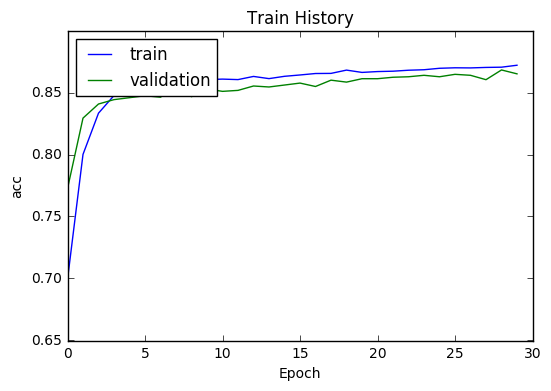

In [23]:
show_train_history(train_history,'acc','val_acc')

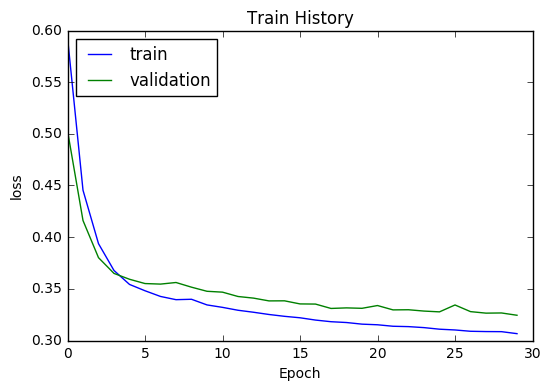

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 138us/step


In [26]:
scores[1]

0.8714353990854874